In [1]:
from Optimization import EnergyLandscapeOptimizer as ELO
import h5py
import numpy as np
import matplotlib.pyplot as plt 
from ChromDynamics import MiChroM


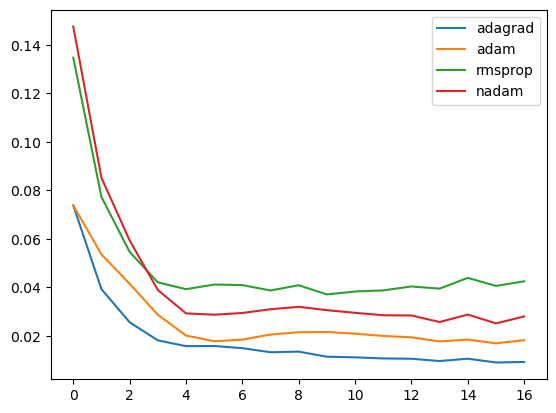

In [37]:
for method in ['adagrad', 'adam', 'rmsprop', 'nadam']:
    opt = ELO(mu = 2.0, rc = 2.0, method = method,
                    eta = 0.01, beta1 = 0.7, beta2 = 0.999,
                    epsilon = 1e-8, it = 1, error_pca_weight = 0.0)
    opt.load_HiC("input/HiC_Bsub_WT.txt")
    error=[]
    for n in range(1,18):
        with h5py.File(f"input/Pi_{n}.h5", "r") as hf:
            opt.phi_sim = np.array(hf['Pi'])
        opt.force_field = np.loadtxt(f"input/lambda_{n}", skiprows=1, delimiter=',')
        grad = opt.get_error_gradient()
        
        updated_force_field = opt.update_step(grad)
        # print(opt.force_field.shape, updated_force_field.shape)
        opt.error = np.sum(np.abs(np.triu(updated_force_field, k=2) - np.triu(opt.force_field, k=2))) / np.abs(np.sum(np.triu(opt.force_field, k=2)))
        error.append(opt.error)
    plt.plot(error, label=method)
        # print(opt.opt_params["m_dw"])
plt.legend()

In [ ]:
# df = pd.read_csv("input/lambda_1", sep=None, engine='python')



In [8]:
updated_force_field = opt.update_step(grad)

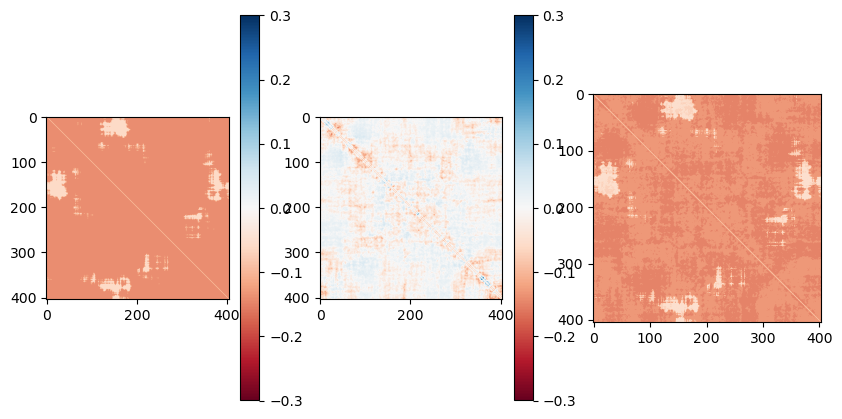

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
p = ax[0].imshow(opt.force_field, cmap='RdBu', vmin=-0.3, vmax=0.3)
fig.colorbar(p, ax=ax[0])
p = ax[1].imshow(grad,cmap='RdBu',vmin=-0.3, vmax=0.3)
fig.colorbar(p,)
ax[2].imshow(updated_force_field, cmap='RdBu' ,vmin=-0.3, vmax=0.3)
# fig.colorbar()
